In [1]:
import pandas as pd
import numpy as np
import cv2
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
from sklearn.model_selection import train_test_split
import os

In [2]:
keras.__version__

'2.3.0-tf'

In [3]:
path = "C:/Users/suhas/Documents/Mini Project/Leaves/"
test = "C:/Users/suhas/Documents/Mini Project/Leaves/Test"

In [4]:
IMAGE_SIZE = 100
num_classes = 32
epochs = 100
initializer = 'he_normal'

In [5]:
def label(img_name):
    num = img_name.split('_')[1]
    #print(num)
    if num == 'pubescent bamboo':
        return 0 
    elif num == 'chinese horse chestnut':
        return 1 
    elif num == 'anhui barberry':
        return 2 
    elif num == 'chinese redbud':
        return 3
    elif num == 'true indigo':
        return 4
    elif num == 'japanese maple':
        return 5 
    elif num == 'nanmu':
        return 6 
    elif num == 'castor aralia':
        return 7 
    elif num == 'chinese cinnamon':
        return 8 
    elif num == 'goldenrain tree':
        return 9 
    elif num == 'big fruited holly':
        return 10 
    elif num == 'japanese chestwood':
        return 11 
    elif num == 'wintersweet':
        return 12 
    elif num == 'camphor tree':
        return 13
    elif num == 'japan arrowwood':
        return 14
    elif num == 'sweet osmanthus':
        return 15
    elif num == 'deodar':
        return 16
    elif num == 'ginkgo':
        return 17 
    elif num == 'crape myrtle':
        return 18 
    elif num == 'oleandar':
        return 19
    elif num == 'yew plum pie':
        return 20
    elif num == 'japanese flowering cherry':
        return 21 
    elif num == 'glossy privet':
        return 22
    elif num == 'chinese toon':
        return 23
    elif num == 'peach':
        return 24
    elif num == 'ford woodlotus':
        return 25
    elif num == 'trident maple':
        return 26
    elif num == 'beales barberry':
        return 27
    elif num == 'southern magnolia':
        return 28
    elif num == 'canadian poplar':
        return 29
    elif num == 'chinese tulip tree':
        return 30
    elif num == 'tangerine':
        return 31

# Creating Dataset

In [22]:
def create_dataset(path):
    data = []
    for folder in os.scandir(path):
        if "leaf" in str(folder):
            for image in os.scandir(os.path.join(path, folder)):
                leaf = label(folder.name)
                if (leaf == None):
                    print(folder.name)
                    break
                img = cv2.imread(os.path.join(path, folder, image))

                # Basic processing
                '''imgGray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

                imgBlur = cv2.GaussianBlur(imgGray, (3, 3), 0)
                thresh, imgBW = cv2.threshold(imgBlur, 128, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
                imgInv = cv2.bitwise_not(imgBW)
                kernel = np.ones((50, 50))
                imgClosed = cv2.morphologyEx(imgInv, cv2.MORPH_CLOSE, kernel)'''

                # Resize
                new = cv2.resize(img, (IMAGE_SIZE, IMAGE_SIZE))
                #Adding third dimension to shape
                data.append([new, leaf])
    return data

In [23]:
data = create_dataset(path)

In [24]:
X = np.array([d[0] for d in data])
len(X)

1907

In [25]:
X = np.divide(X, 255)
len(X)
X.shape

(1907, 100, 100, 3)

In [26]:
y = np.array([d[1] for d in data])
len(y)

1907

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1, stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, random_state = 1, stratify=y_train)

# CNN

In [50]:
model = Sequential([
    layers.InputLayer(input_shape=(IMAGE_SIZE, IMAGE_SIZE, 3)),
    layers.Conv2D(16, 3, padding='same', activation='relu', kernel_initializer=initializer),
    layers.MaxPool2D(),
    layers.BatchNormalization(),
    # Dropout layer for regularisation
    layers.Dropout(rate=0.5),
    layers.Conv2D(32, 3, padding='same', activation='relu', kernel_initializer=initializer),
    layers.MaxPool2D(),
    layers.BatchNormalization(),
    # Dropout layer for regularisation
    layers.Dropout(rate=0.5),
    layers.Conv2D(64, 5, padding='same', activation='relu', kernel_initializer=initializer),
    layers.MaxPool2D(),
    layers.BatchNormalization(),
    # Dropout layer for regularisation
    layers.Dropout(rate=0.5),
    # Flattening output to connect to Densely Connected Layers
    layers.Flatten(),
    layers.Dense(128, activation='relu', kernel_initializer=initializer),
    layers.BatchNormalization(),
    layers.Dense(num_classes, activation='softmax', kernel_initializer=initializer)
])

In [51]:
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [52]:
X_train.shape

(1072, 100, 100, 3)

In [53]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 100, 100, 16)      448       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 50, 50, 16)        0         
_________________________________________________________________
batch_normalization_16 (Batc (None, 50, 50, 16)        64        
_________________________________________________________________
dropout_12 (Dropout)         (None, 50, 50, 16)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 50, 50, 32)        4640      
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 25, 25, 32)        0         
_________________________________________________________________
batch_normalization_17 (Batc (None, 25, 25, 32)       

In [54]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=20)

In [55]:
history = model.fit(x=X_train, y=y_train, epochs=epochs, validation_data = (X_val, y_val), use_multiprocessing = True, batch_size=32, callbacks=[callback])

Epoch 1/100
34/34 [==============================] - 8s 240ms/step - loss: 3.2263 - accuracy: 0.3209 - val_loss: 3.4477 - val_accuracy: 0.0447
Epoch 2/100
34/34 [==============================] - 10s 291ms/step - loss: 2.9596 - accuracy: 0.6035 - val_loss: 3.4511 - val_accuracy: 0.0419
Epoch 3/100
34/34 [==============================] - 9s 265ms/step - loss: 2.8720 - accuracy: 0.6940 - val_loss: 3.4534 - val_accuracy: 0.0475
Epoch 4/100
34/34 [==============================] - 9s 267ms/step - loss: 2.8094 - accuracy: 0.7565 - val_loss: 3.4198 - val_accuracy: 0.0810
Epoch 5/100
34/34 [==============================] - 9s 255ms/step - loss: 2.7407 - accuracy: 0.8144 - val_loss: 3.3757 - val_accuracy: 0.1480
Epoch 6/100
34/34 [==============================] - 9s 269ms/step - loss: 2.7096 - accuracy: 0.8414 - val_loss: 3.3863 - val_accuracy: 0.1229
Epoch 7/100
34/34 [==============================] - 9s 271ms/step - loss: 2.6854 - accuracy: 0.8591 - val_loss: 3.3265 - val_accuracy: 0.203

34/34 [==============================] - 12s 359ms/step - loss: 2.5268 - accuracy: 0.9944 - val_loss: 2.7061 - val_accuracy: 0.8128
Epoch 58/100
34/34 [==============================] - 15s 428ms/step - loss: 2.5259 - accuracy: 0.9953 - val_loss: 2.7266 - val_accuracy: 0.8045
Epoch 59/100
34/34 [==============================] - 13s 369ms/step - loss: 2.5269 - accuracy: 0.9944 - val_loss: 2.7835 - val_accuracy: 0.7626
Epoch 60/100
34/34 [==============================] - 12s 365ms/step - loss: 2.5266 - accuracy: 0.9953 - val_loss: 2.6923 - val_accuracy: 0.8436
Epoch 61/100
34/34 [==============================] - 14s 402ms/step - loss: 2.5284 - accuracy: 0.9935 - val_loss: 2.8374 - val_accuracy: 0.7123
Epoch 62/100
34/34 [==============================] - 13s 388ms/step - loss: 2.5277 - accuracy: 0.9944 - val_loss: 2.8165 - val_accuracy: 0.7151
Epoch 63/100
34/34 [==============================] - 12s 363ms/step - loss: 2.5259 - accuracy: 0.9972 - val_loss: 2.6867 - val_accuracy: 0.849

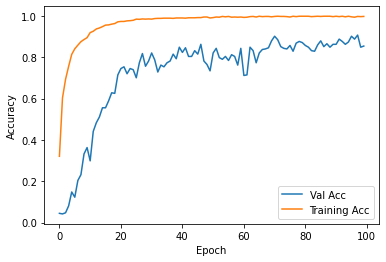

In [56]:
plt.figure()
plt.plot([i for i in range(epochs)], history.history['val_accuracy'], label='Val Acc')
plt.plot([i for i in range(epochs)], history.history['accuracy'], label='Training Acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

In [57]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [58]:
model.evaluate(X_test, y_test)

15/15 [==============================] - 1s 70ms/step - loss: 2.6936 - accuracy: 0.8365


[2.6935768127441406, 0.8364779949188232]

In [59]:
tf.keras.models.save_model(model, 'C:/Users/suhas/Documents/College Projects/Leaf-Classification-Medicinal/model')

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: C:/Users/suhas/Documents/College Projects/Leaf-Classification-Medicinal/model\assets


In [60]:
max(history.history['val_accuracy'])

0.9078212380409241